## Mini Time Series Project 

#### This project predicts the number customers who travel using Jet Rails Tranportation

#### Hypothesis is based on the time of the day

##### 1. Weekends would have less use of transportation compared to weekdays since people don't work much during weekends
##### 2. Transport service would be high during peak hours
##### 3. Transport service would be high during May to October, that's the year people/tourist visit places, hence high transportation
##### 4. Number of passengers would increase with time as population increase

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Dell'

In [3]:
os.chdir(r'C:\Users\Dell\Desktop\Data Science\Projects\Time series')

In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [13]:
# Making copies of the original datasets
train_original = train.copy()
test_original = test.copy()

In [12]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [15]:
train.isna().sum()

ID          0
Datetime    0
Count       0
dtype: int64

In [16]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        5112 non-null   int64 
 1   Datetime  5112 non-null   object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


In [18]:
test.isna().sum()

ID          0
Datetime    0
dtype: int64

In [20]:
#Convert Datetime columns in both test and train to access and extract time related features
datasets = [train, test]
for dataset in datasets:
    dataset['Datetime'] = pd.to_datetime(dataset['Datetime'], format = '%d-%m-%Y %H:%M')


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        5112 non-null   int64         
 1   Datetime  5112 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 80.0 KB


In [23]:
# Extracting time features from both test and train features
# Year, Month, Day, Hour
for dataset in datasets:
    dataset['Year'] = dataset['Datetime'].dt.year
    dataset['Month'] = dataset['Datetime'].dt.month
    dataset['Day'] = dataset['Datetime'].dt.day
    dataset['Hour'] = dataset['Datetime'].dt.hour

In [24]:
train.head()

,ID,Datetime,Count,Year,Month,Day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [25]:
test.head()

,ID,Datetime,Year,Month,Day,Hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [28]:
# Extract Weekend
train['DayofWeek'] = train['Datetime'].dt.dayofweek
test['DayofWeek'] = test['Datetime'].dt.dayofweek

In [27]:
train.head()

,ID,Datetime,Count,Year,Month,Day,Hour,DayofWeek
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [29]:
# Defining a function that creates a weekend feature
def isweekend(row):
    if row == 5 or row == 6:
        return 1
    else:
        return 0

In [33]:
for dataset in datasets:
    dataset['isWeekend'] = dataset['DayofWeek'].apply(isweekend)

In [34]:
train['isWeekend'].value_counts()

0    13056
1     5232
Name: isWeekend, dtype: int64

In [35]:
test['isWeekend'].value_counts()

0    3624
1    1488
Name: isWeekend, dtype: int64

In [42]:
for dataset in datasets:
    dataset = dataset.drop(['ID', 'DayofWeek'], axis = 1, inplace = True)

In [43]:
train.head()

,Datetime,Count,Year,Month,Day,Hour,isWeekend
0,2012-08-25 00:00:00,8,2012,8,25,0,1
1,2012-08-25 01:00:00,2,2012,8,25,1,1
2,2012-08-25 02:00:00,6,2012,8,25,2,1
3,2012-08-25 03:00:00,2,2012,8,25,3,1
4,2012-08-25 04:00:00,2,2012,8,25,4,1


In [44]:
test.head()

,Datetime,Year,Month,Day,Hour,isWeekend
0,2014-09-26 00:00:00,2014,9,26,0,0
1,2014-09-26 01:00:00,2014,9,26,1,0
2,2014-09-26 02:00:00,2014,9,26,2,0
3,2014-09-26 03:00:00,2014,9,26,3,0
4,2014-09-26 04:00:00,2014,9,26,4,0


### Exploring the Data to Draw Insights

In [46]:
train.index = train['Datetime']

#### Checking for Trends

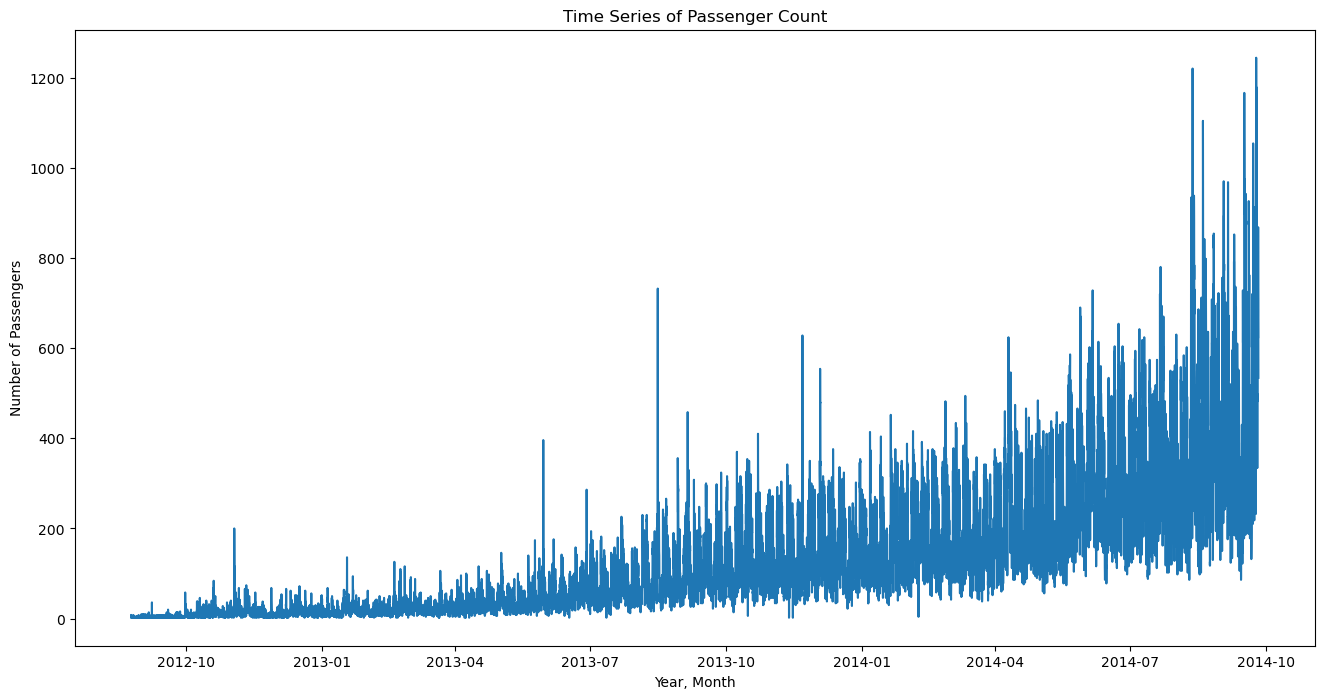

In [50]:
# visualizing Passenger count according to time

plt.figure(figsize = (16, 8))
plt.plot(train['Count'], label = 'Passenger Count')
plt.xlabel('Year, Month')
plt.title('Time Series of Passenger Count')
plt.ylabel('Number of Passengers')
plt.show()

#### The plot shows an increasing trend in the series

In [54]:
# Checking starting date and ending datetime in the dataset
train.Datetime.min(), train.Datetime.max()

(Timestamp('2012-08-25 00:00:00'), Timestamp('2014-09-25 23:00:00'))